In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [25]:
df = pd.read_csv('../data/Titanic-Dataset.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [26]:
df.shape


(891, 12)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Drop unwanted columns

In [29]:
df = df.drop(['PassengerId','Cabin','Name','Ticket'], axis=1)


### Handle Missing values

In [30]:
df['Age']= df['Age'].fillna(df['Age'].median())

In [31]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [32]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Convert Categorical Data in to numeric

In [33]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

#### Encode Embared

In [34]:
df = pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [35]:
correlation = df.corr()['Survived'].sort_values(ascending=False)
correlation

Survived      1.000000
Sex           0.543351
Fare          0.257307
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.064910
Embarked_S   -0.149683
Pclass       -0.338481
Name: Survived, dtype: float64

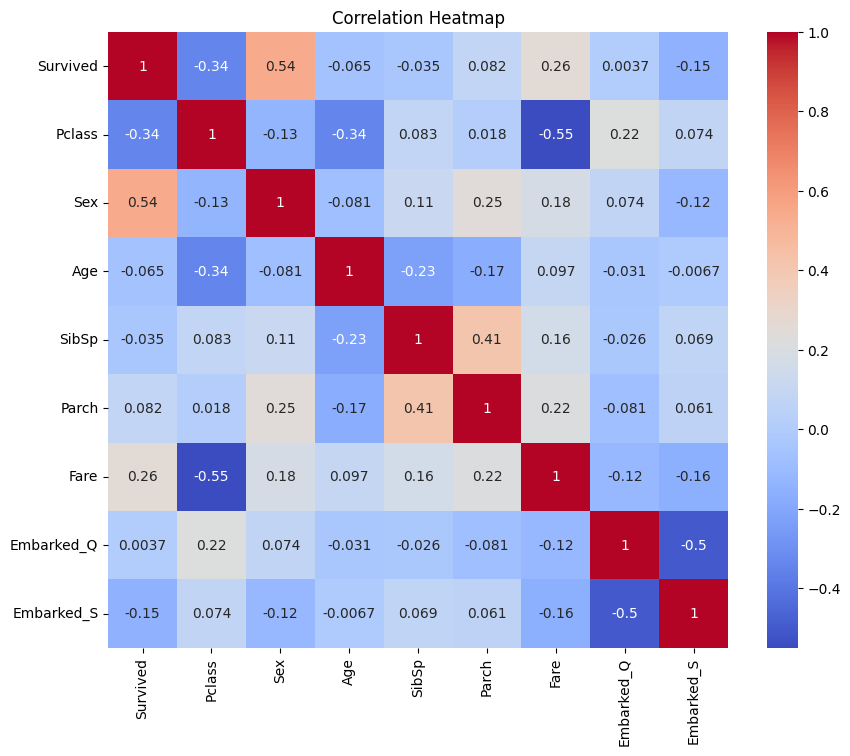

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Feature Engineering 

In [37]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [38]:
df['IsAlone'] = 1
df['IsAlone'] = df['FamilySize'].apply(lambda x : 0 if x > 1 else 1)

### Split into Data

In [39]:
X = df.drop('Survived',axis=1)
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2, random_state=42) 

In [40]:
scaler = StandardScaler()
X_train[['Age','Fare']] = scaler.fit_transform(X_train[['Age','Fare']])
X_test[['Age','Fare']] = scaler.transform(X_test[['Age',"Fare"]]) 

### Train Models 

#### Logistic Regression

In [41]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [42]:
log_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(log_pred,y_test)
print("Logistic Regression Accuracy : ",log_accuracy)

Logistic Regression Accuracy :  0.7988826815642458


#### Random Forest Model

In [43]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_pred)
print("Random Forest Accuracy : ",rf_accuracy)

Random Forest Accuracy :  0.8156424581005587


In [45]:
models = {
    "LogisticRegression": log_model,
    "RandomForestClassifier":rf_model
}

for name,model in models.items():
    print(f"=== {name} ===")
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\n-------------------------\n")

=== LogisticRegression ===
Accuracy: 0.7988826815642458

Confusion Matrix:
 [[90 15]
 [21 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


-------------------------

=== RandomForestClassifier ===
Accuracy: 0.8156424581005587

Confusion Matrix:
 [[89 16]
 [17 57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


-------------------------

